# Loading Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.colors as pc
from plotly.subplots import make_subplots
from sklearn.linear_model import LinearRegression
plt.style.use('ggplot')

top_1500_steam = pd.read_csv('data/top_1500_steam.csv')

# Feature Engineering

In [2]:
import calendar
# Exploring price_category vs revenue and price vs copies sold
bins = [-1, 0, 10, 50, float('inf')]  # -1 to include 0 in the first bin
labels = ['Free to Play', 'Under $10', '$10-50', 'Over $50']
top_1500_steam['price_category'] = pd.cut(top_1500_steam['price'], bins=bins, labels=labels)

top_1500_steam['release_date'] = pd.to_datetime(top_1500_steam['release_date'], format='%Y-%m-%d')
top_1500_steam['release_month'] = top_1500_steam['release_date'].dt.month_name()
month_order = list(calendar.month_name[1:])
top_1500_steam['release_month'] = pd.Categorical(top_1500_steam['release_month'], categories=month_order, ordered=True)

bins = [-1, 10, 20, 40, 50, 70, 80, 95, float('inf')] # Based on how steam categorizes
labels = ['Overwhelmingly Negative', 'Negative', 'Mostly Negative', 'Mixed', 'Mostly Positive', 'Positive', 'Very Positive', 'Overwhelmingly Positive']
top_1500_steam['review_score_category'] = pd.cut(top_1500_steam['review_score'], bins=bins, labels=labels)

# Basic Statistics

In [81]:
top_1500_steam.head()

,name,release_date,copies_sold,price,revenue,avg_playtime,review_score,publisher_class,publishers,developers,steam_id
0,WWE 2K24,2024-03-07,165301,99.99,8055097.0,42.365140,71,AAA,2K,Visual Concepts,2315690
1,EARTH DEFENSE FORCE 6,2024-07-25,159806,59.99,7882151.0,29.651061,57,Indie,D3PUBLISHER,SANDLOT,2291060
2,Sins of a Solar Empire II,2024-08-15,214192,49.99,7815247.0,12.452593,88,Indie,Stardock Entertainment,"Ironclad Games Corporation,Stardock Entertainment",1575940
3,Legend of Mortal,2024-06-14,440998,19.99,7756399.0,24.797817,76,Indie,"Paras Games,Obb Studio Inc.",Obb Studio Inc.,1859910
4,Shin Megami Tensei V: Vengeance,2024-06-13,141306,59.99,7629252.0,34.258496,96,AA,SEGA,ATLUS,1875830


In [6]:
print(top_1500_steam.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1500 non-null   object 
 1   release_date     1500 non-null   object 
 2   copies_sold      1500 non-null   int64  
 3   price            1500 non-null   float64
 4   revenue          1500 non-null   float64
 5   avg_playtime     1500 non-null   float64
 6   review_score     1500 non-null   int64  
 7   publisher_class  1500 non-null   object 
 8   publishers       1499 non-null   object 
 9   developers       1498 non-null   object 
 10  steam_id         1500 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 129.0+ KB
None


In [11]:
display(top_1500_steam.describe())
display(top_1500_steam[top_1500_steam.select_dtypes(include='object').columns].describe())


,copies_sold,price,revenue,avg_playtime,review_score,steam_id
count,1.500000e+03,1500.000000,1.500000e+03,1500.000000,1500.000000,1.500000e+03
mean,1.414826e+05,17.519513,2.632382e+06,12.562704,76.201333,2.183788e+06
std,1.132757e+06,12.646612,2.781024e+07,21.542173,24.319438,6.067725e+05
min,5.930000e+02,0.000000,2.067400e+04,0.000000,0.000000,2.488000e+04
25%,4.918750e+03,9.990000,4.550425e+04,3.564848,72.000000,1.792795e+06
50%,1.192850e+04,14.990000,1.090530e+05,6.762776,83.000000,2.321985e+06
75%,3.786975e+04,19.990000,4.551568e+05,13.104473,92.000000,2.693228e+06
max,3.073915e+07,99.990000,8.377934e+08,296.332852,100.000000,3.107330e+06


,name,release_date,publisher_class,publishers,developers
count,1500,1500,1500,1499,1498
unique,1500,235,4,1131,1406
top,WWE 2K24,2024-03-07,Indie,Kagura Games,Lust Desires 🖤
freq,1,27,1301,17,9


In [9]:
import plotly.graph_objects as go

# Sample data preparation (replace this with your actual DataFrame)
def plot_publisher_class_distribution() -> go.Figure:
    data = top_1500_steam['publisher_class'].value_counts().reset_index(name='count')

    # Create the pie chart
    fig = go.Figure(
        data=[
            go.Pie(
                labels=data["publisher_class"],
                values=data["count"],
                hoverinfo="label+percent",
                textinfo="value",
                textfont_size=14,
                marker=dict(line=dict(color="white", width=2)),
            )
        ]
    )
    fig.update_layout(
        title_text="Distribution of Publisher Classes",
        showlegend=True,
        height=400
    )
    return fig
plot_publisher_class_distribution().show()

In [6]:
# def plot_correlation_heatmap() -> plt.Figure:
#     plt.figure()
#     sns.heatmap(
#         top_1500_steam[top_1500_steam.select_dtypes(include="number").columns].corr(),
#         annot=True,
#     )
#     return plt.gcf()
# fig = plot_correlation_heatmap()

def plot_correlation_heatmap() -> go.Figure:
    corr_matrix = top_1500_steam.select_dtypes(include='number').drop('steam_id', axis=1).corr()
    corr_matrix = np.round(corr_matrix, 2)

    fig = px.imshow(
        corr_matrix,
        text_auto=True, 
        color_continuous_scale='RdBu_r',
        zmin=-1,
        zmax=1,
        aspect="auto"
    )
    
    fig.update_layout(
        title='Correlation heatmap',
        width=700,
        height=700,
        margin=dict(l=120, r=120, t=100, b=100)
    )
    
    return fig

fig = plot_correlation_heatmap()
fig.show()

# Sales Trends

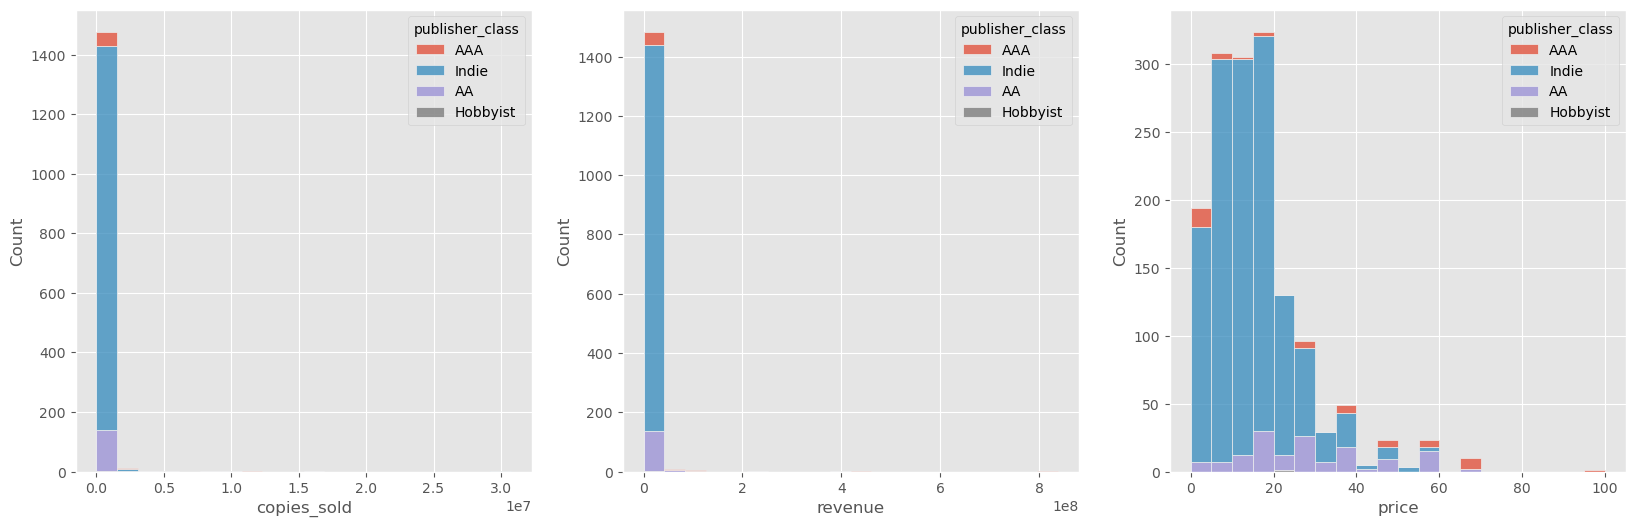

In [7]:
# Plotting copies_sold, price, and revenue distributions
def plot_sales_distributions() -> plt.Figure:
    fig, axes = plt.subplots(1, 3, figsize=(20, 6))
    axes: list[plt.Axes] = axes.ravel()

    sns.histplot(
        data=top_1500_steam,
        x='copies_sold',
        bins=20,
        hue='publisher_class',
        multiple='stack',
        ax=axes[0]
    )

    sns.histplot(
        data=top_1500_steam,
        x='revenue',
        bins=20,
        hue='publisher_class',
        multiple='stack',
        ax=axes[1]
    )

    sns.histplot(
        data=top_1500_steam,
        x='price',
        bins=20,
        hue='publisher_class',
        multiple='stack',
        ax=axes[2]
    )

    return fig
plot_sales_distributions()

#TODO: Make this toggleable between choosing separation by publisher class or not.
# Distribution of release_date

# def plot_release_date_distribution():
#     fig, axes = plt.subplots(1, 2, figsize=(20, 6))

#     sns.histplot(
#         data=top_1500_steam,
#         x='release_date',
#         hue='publisher_class',
#         multiple='stack',
#         kde=True,
#         discrete=True,
#         ax=axes[0]
#     )
#     axes[0].set_title("Release Date Distribution (Day)")

#     sns.histplot(
#         data=top_1500_steam,
#         x='release_month',
#         hue='publisher_class',
#         multiple='stack',
#         kde=True,
#         discrete=True,
#         ax=axes[1]
#     )
#     axes[1].set_title("Release Date Distribution (Month)")

# # plot_release_date_distribution()

Because our standard deviations are unnaturally high due to the outliers, using a z-score metric for detecting outliers does not feel appropriate. Instead, we can first do a trivial check on the top hitters within our top games.

### Examining Copies Sold and Revenue Further

Percentage of copies sold by top 10 to total copies sold within dataset: 52.74%
Percentage of revenue by top 10 to total revenue within dataset: 61.56%


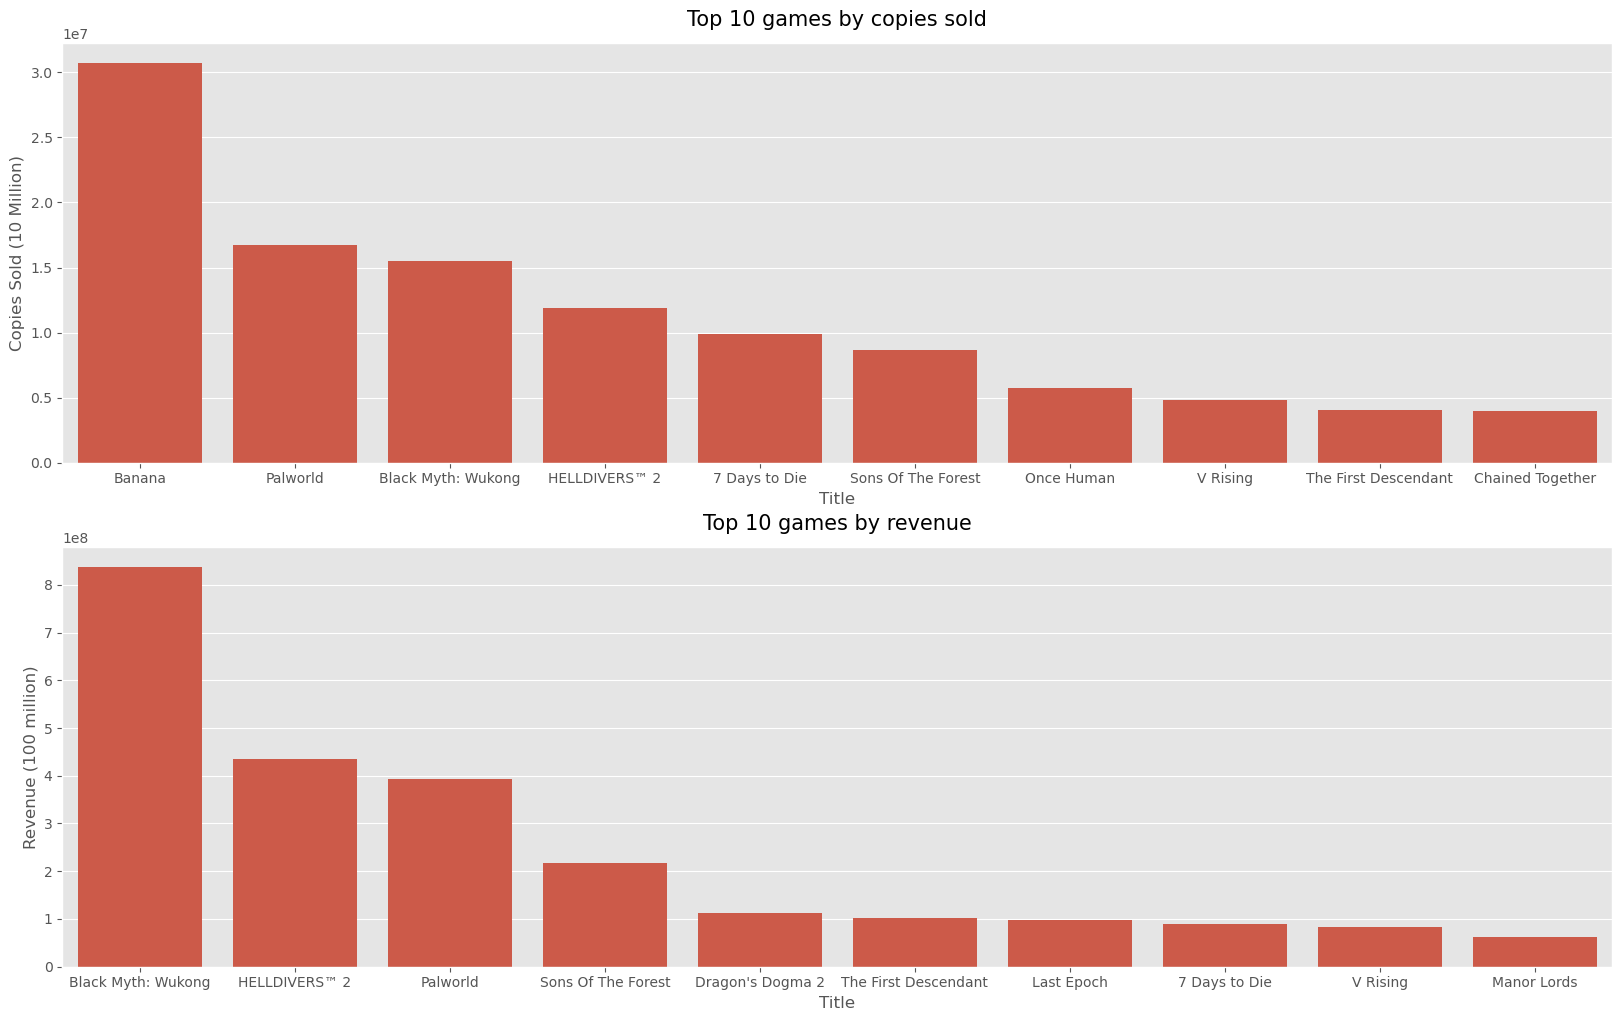

In [19]:
def plot_top_n_copies_sold_and_revenue(copies_sold_n: int = 10, revenue_n: int = 10) -> plt.Figure:
    # Comparing copies sold within our top 10 sorted by copies sold
    fig, axes = plt.subplots(2, 1, figsize=((20, 12)))
    axes: list[plt.Axes]  = axes.ravel()

    sorted_by_copies_sold = top_1500_steam.sort_values(by='copies_sold', ascending=False)

    sns.barplot(
        x=sorted_by_copies_sold.head(copies_sold_n)["name"],
        y=sorted_by_copies_sold.head(copies_sold_n)["copies_sold"],
        ax=axes[0]
    )
    axes[0].set_title(f"Top {copies_sold_n} games by copies sold", fontsize=15, y=1.02)
    axes[0].set_xlabel("Title")
    axes[0].set_ylabel("Copies Sold (10 Million)")

    # Checking the proportion of copies sold from the top 10 to total copies sold of all games within our dataset:
    percentage_of_total_copies_sold_within_top_n = (sorted_by_copies_sold.head(copies_sold_n)['copies_sold'].sum() / top_1500_steam['copies_sold'].sum()) * 100
    print(f'Percentage of copies sold by top {copies_sold_n} to total copies sold within dataset: {percentage_of_total_copies_sold_within_top_n:.2f}%')

    # Comparing copies sold within our top 10 sorted by copies sold
    sorted_by_revenue = top_1500_steam.sort_values(by="revenue", ascending=False)

    sns.barplot(
        x=sorted_by_revenue.head(revenue_n)["name"],
        y=sorted_by_revenue.head(revenue_n)["revenue"],
        ax=axes[1]
    )
    axes[1].set_title(f"Top {revenue_n} games by revenue", fontsize=15, y=1.02)
    axes[1].set_xlabel("Title")
    axes[1].set_ylabel("Revenue (100 million)")

    # Checking the proportion of copies sold from the top 10 to total copies sold of all games within our dataset:
    percentage_of_total_revenue_within_top_n = (sorted_by_revenue.head(revenue_n)['revenue'].sum() / top_1500_steam['revenue'].sum()) * 100
    print(f'Percentage of revenue by top {revenue_n} to total revenue within dataset: {percentage_of_total_revenue_within_top_n:.2f}%')
    return fig

fig = plot_top_n_copies_sold_and_revenue()

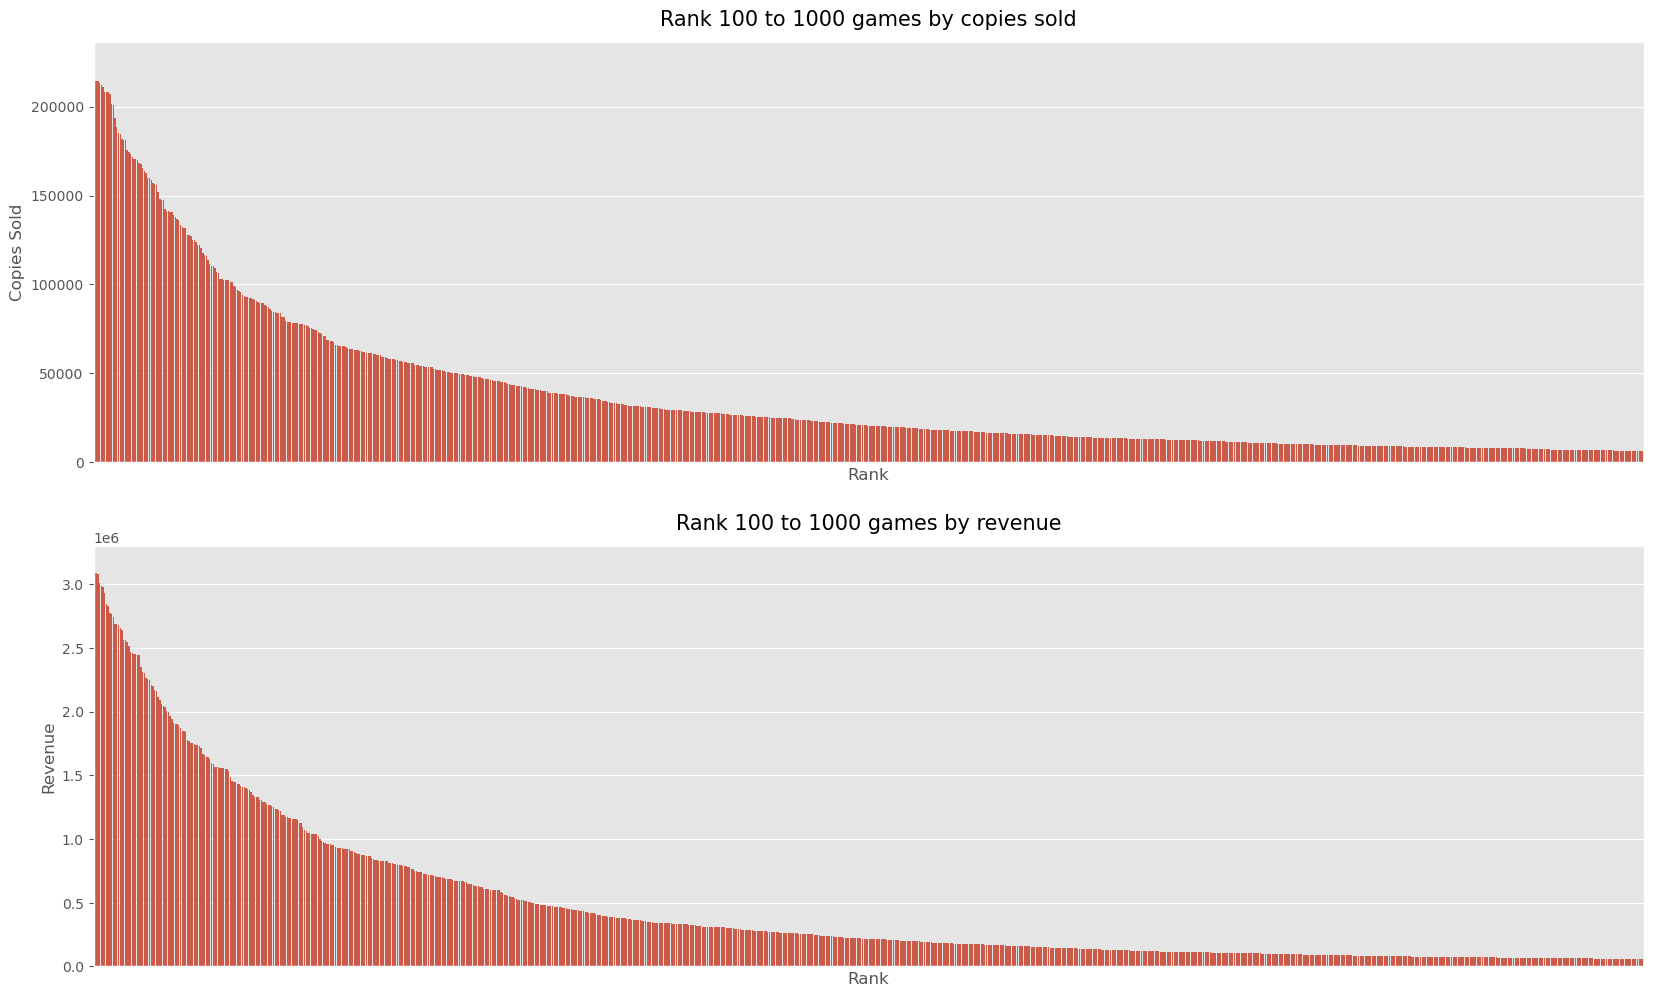

In [20]:
def plot_range_copies_sold_and_revenue(copies_sold_range: tuple[int, int] = (100, 1000), revenue_range: tuple[int, int] = (100, 1000)) -> plt.Figure:
    # Comparing copies sold within our top 10 sorted by copies sold

    sorted_by_copies_sold = top_1500_steam.sort_values(by='copies_sold', ascending=False)
    sorted_by_revenue = top_1500_steam.sort_values(by="revenue", ascending=False)

    fig, axes = plt.subplots(2, 1, figsize=(20, 12))
    axes: list[plt.Axes] = axes.ravel()

    start, stop = copies_sold_range
    selection = sorted_by_copies_sold.iloc[start:stop]
    sns.barplot(
        x=list(range(start, stop)), 
        y=selection["copies_sold"],
        ax=axes[0]
    )
    axes[0].set_title(f"Rank {start} to {stop} games by copies sold", fontsize=15, y=1.02)
    axes[0].set_xticks([])
    axes[0].set_xlabel("Rank")
    axes[0].set_ylabel("Copies Sold")

    start, stop = revenue_range
    selection = sorted_by_revenue.iloc[start:stop]
    sns.barplot(
        x=list(range(start, stop)), 
        y=selection["revenue"],
        ax=axes[1]
    )
    axes[1].set_title(f"Rank {start} to {stop} games by revenue", fontsize=15, y=1.02)
    axes[1].set_xticks([])
    axes[1].set_xlabel("Rank")
    axes[1].set_ylabel("Revenue")

    # TODO: Also print out summary stats for the range

    # Checking the proportion of copies sold from the top 10 to total copies sold of all games within our dataset:
    # percentage_of_total_copies_sold_within_top_n = (sorted_by_copies_sold.head(copies_sold_n)['copies_sold'].sum() / top_1500_steam['copies_sold'].sum()) * 100
    # print(f'Percentage of copies sold by top {copies_sold_n} to total copies sold within dataset: {percentage_of_total_copies_sold_within_top_n:.2f}%')

    # # Comparing copies sold within our top 10 sorted by copies sold

    # # Checking the proportion of copies sold from the top 10 to total copies sold of all games within our dataset:
    # percentage_of_total_revenue_within_top_n = (sorted_by_revenue.head(revenue_n)['revenue'].sum() / top_1500_steam['revenue'].sum()) * 100
    # print(f'Percentage of revenue by top {revenue_n} to total revenue within dataset: {percentage_of_total_revenue_within_top_n:.2f}%')
    
    return fig

fig = plot_range_copies_sold_and_revenue()

    

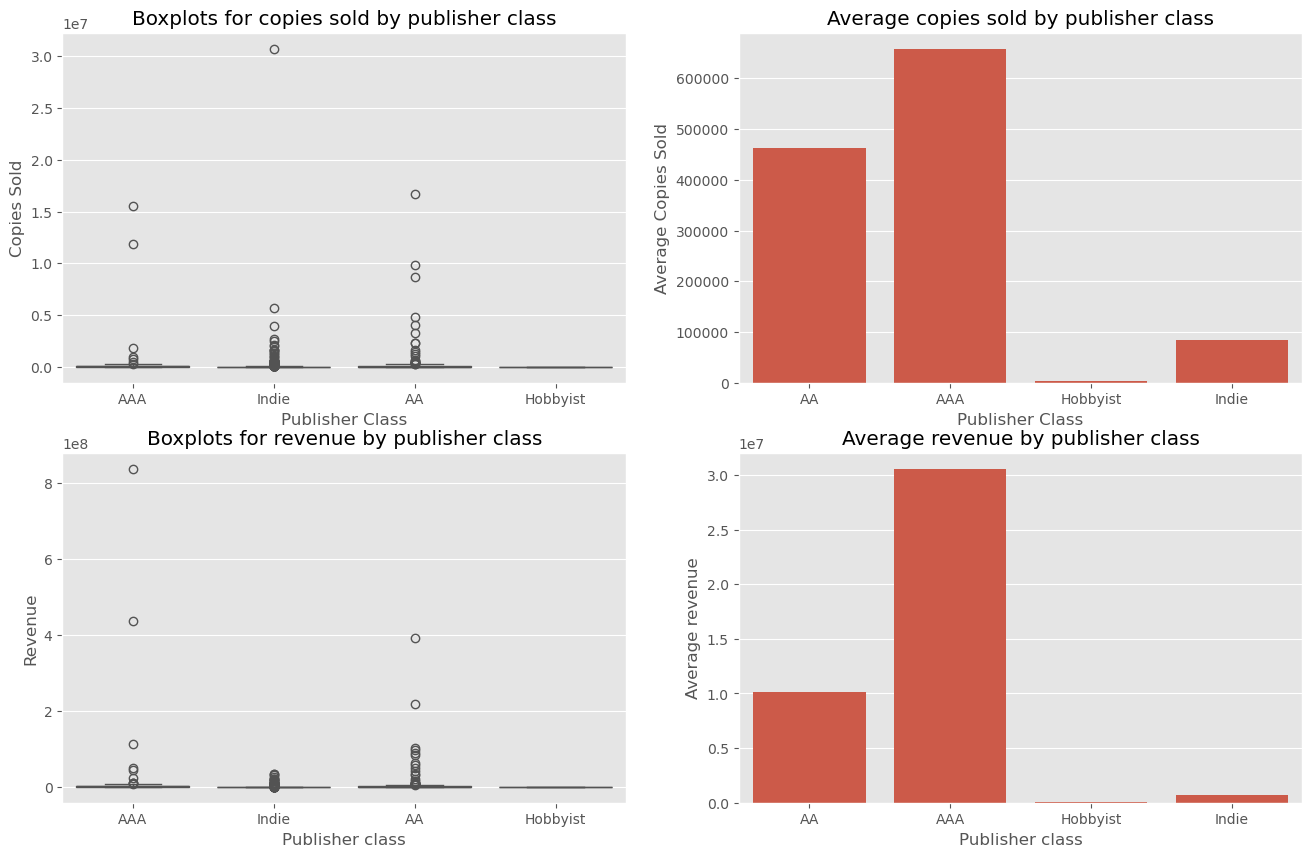

In [47]:
def plot_avg_copies_sold_and_revenue() -> plt.Figure:
    avg_copies_sold_by_publisher = top_1500_steam.groupby('publisher_class')['copies_sold'].mean().reset_index()
        
    fig, axes = plt.subplots(2, 2, figsize=(16, 10))
    axes: plt.Axes = axes.ravel()

    sns.boxplot(data=top_1500_steam, x='publisher_class', y='copies_sold', ax=axes[0])
    axes[0].set_title('Boxplots for copies sold by publisher class')
    axes[0].set_xlabel('Publisher Class')
    axes[0].set_ylabel('Copies Sold')

    sns.barplot(x=avg_copies_sold_by_publisher['publisher_class'], y=avg_copies_sold_by_publisher['copies_sold'], ax=axes[1])
    axes[1].set_title('Average copies sold by publisher class')
    axes[1].set_xlabel('Publisher Class')
    axes[1].set_ylabel('Average Copies Sold')

    avg_revenue_by_publisher = top_1500_steam.groupby('publisher_class')['revenue'].mean().reset_index()
        
    sns.boxplot(data=top_1500_steam, x='publisher_class', y='revenue', ax=axes[2])
    axes[2].set_title('Boxplots for revenue by publisher class')
    axes[2].set_xlabel('Publisher class')
    axes[2].set_ylabel('Revenue')

    sns.barplot(x=avg_revenue_by_publisher['publisher_class'], y=avg_revenue_by_publisher['revenue'], ax=axes[3])
    axes[3].set_title('Average revenue by publisher class')
    axes[3].set_xlabel('Publisher class')
    axes[3].set_ylabel('Average revenue')
    return fig
fig = plot_avg_copies_sold_and_revenue()

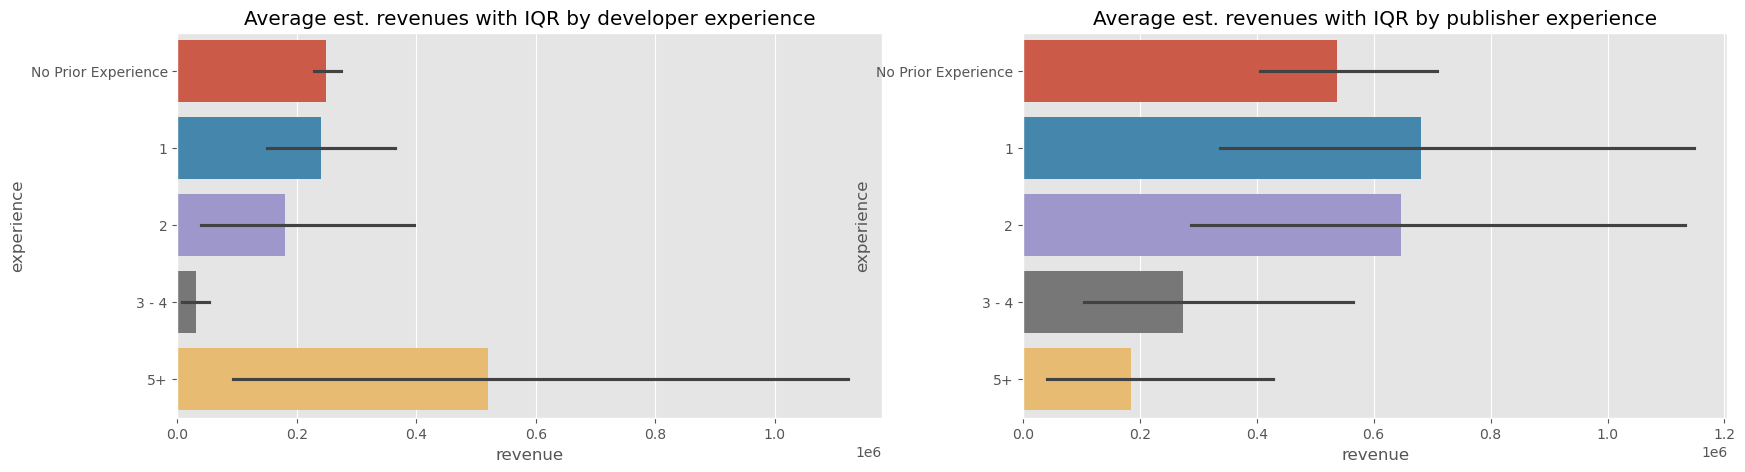

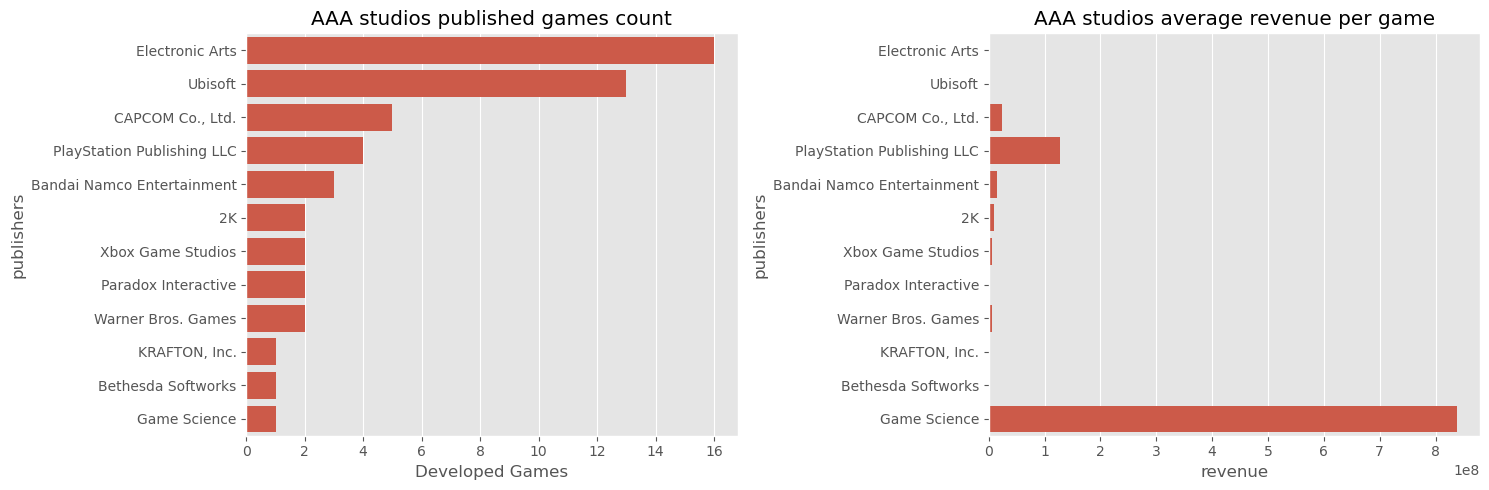

In [59]:
# Encoding a new column called "experience"
def plot_experience_to_revenue():
    bins = [0, 1, 2, 3, 5, float('inf')]  # Define the bin edges
    labels = ['No Prior Experience', '1', '2', '3 - 4', '5+']  # Define the labels for each bin

    # ------------------------------------

    AAA_publisher_counts = top_1500_steam[top_1500_steam['publisher_class'] == "AAA"]['publishers'].value_counts().reset_index(name='Developed Games')
    AAA_publisher_revenue = top_1500_steam[top_1500_steam['publisher_class'] == "AAA"].groupby('publishers')['revenue'].mean().reset_index()
    AAA_publisher_summary = pd.merge(AAA_publisher_counts, AAA_publisher_revenue, left_on='publishers', right_on='publishers', how='left')
    AAA_publisher_counts['experience'] = pd.cut(AAA_publisher_counts['Developed Games'], bins=bins, labels=labels)
    AAA_publisher_summary = pd.merge(AAA_publisher_counts, AAA_publisher_revenue, left_on='publishers', right_on='publishers', how='left')
    AAA_publisher_summary.loc[AAA_publisher_summary['revenue'].isna(), 'revenue'] = 0
    AAA_publisher_summary['publishers'] = AAA_publisher_summary['publishers'].astype(str)


    indie_publishers_exploded = top_1500_steam[top_1500_steam['publisher_class'] == "Indie"]['publishers'].str.split(',').explode()
    indie_publisher_counts = indie_publishers_exploded.groupby(indie_publishers_exploded).size().reset_index(name='Developed Games')
    indie_publisher_revenue = top_1500_steam[top_1500_steam['publisher_class'] == "Indie"].groupby('publishers')['revenue'].mean().reset_index()

    indie_publisher_counts['experience'] = pd.cut(indie_publisher_counts['Developed Games'], bins=bins, labels=labels)
    indie_publisher_summary = pd.merge(indie_publisher_counts, indie_publisher_revenue, left_on='publishers', right_on='publishers', how='left')
    indie_publisher_summary.loc[indie_publisher_summary['revenue'].isna(), 'revenue'] = 0
    indie_publisher_summary['publishers'] = indie_publisher_summary['publishers'].astype(str)

    # ------------------------------------

    start, stop = (100, 500)

    bins = [0, 1, 2, 3, 5, float('inf')]  # Define the bin edges
    labels = ['No Prior Experience', '1', '2', '3 - 4', '5+']  # Define the labels for each bin

    developers_exploded = top_1500_steam['developers'].str.split(',').explode()
    developer_counts = developers_exploded.groupby(developers_exploded).size().reset_index(name='Developed Games')
    developer_revenue = top_1500_steam.groupby('developers')['revenue'].mean().reset_index()
    developer_counts['experience'] = pd.cut(developer_counts['Developed Games'], bins=bins, labels=labels)
    developer_summary = pd.merge(developer_counts, developer_revenue, left_on='developers', right_on='developers', how='left')
    developer_summary.loc[developer_summary['revenue'].isna(), 'revenue'] = 0
    developer_summary['developers'] = developer_summary['developers'].astype(str)

    sorted_by_revenue = developer_summary.sort_values(by='revenue', ascending=False)
    selection = sorted_by_revenue.iloc[start:]

    # ------------------------------------

    # display(selection)
    # display(indie_publisher_summary)
    # display(AAA_publisher_summary)

    fig_1, axes = plt.subplots(1, 2, figsize=(20 , 5))
    axes: list[plt.Axes] = axes.ravel()
    sns.barplot(data=selection, x='revenue', y='experience', hue='experience', orient='h', ax=axes[0])
    axes[0].set_title("Average est. revenues with IQR by developer experience")

    sns.barplot(data=indie_publisher_summary, x='revenue', y='experience', hue='experience', orient='h', ax=axes[1])
    axes[1].set_title("Average est. revenues with IQR by publisher experience")

    fig_2, axes = plt.subplots(1, 2, figsize=(15, 5))
    sns.barplot(data=AAA_publisher_counts, x='Developed Games', y='publishers', orient='h', ax=axes[0])
    axes[0].set_title("AAA studios published games count")
    sns.barplot(data=AAA_publisher_summary, x='revenue', y='publishers', orient='h', ax=axes[1])
    axes[1].set_title("AAA studios average revenue per game")
    plt.tight_layout()

    return fig_1, fig_2

fig_1, fig_2 = plot_experience_to_revenue()


In [102]:
# Plot Regression and Scatter for copies_sold and revenue

def plot_copies_sold_and_revenue_regression():
    # Linear regression model
    X = top_1500_steam[['copies_sold']]
    y = top_1500_steam['revenue']
    model = LinearRegression().fit(X, y)
    predicted_revenue = model.predict(X)

    # Scatter plot with regression line
    fig = px.scatter(
        top_1500_steam,
        x="copies_sold",
        y="revenue",
        title="Copies Sold vs Revenue",
        labels={"copies_sold": "Copies Sold", "revenue": "Revenue"},
    )
    fig.add_traces(px.line(top_1500_steam, x="copies_sold", y=predicted_revenue).data)

    return fig
fig = plot_copies_sold_and_revenue_regression()
fig.show()

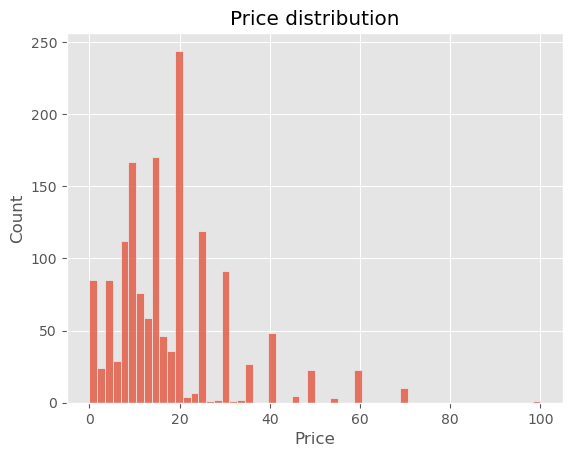

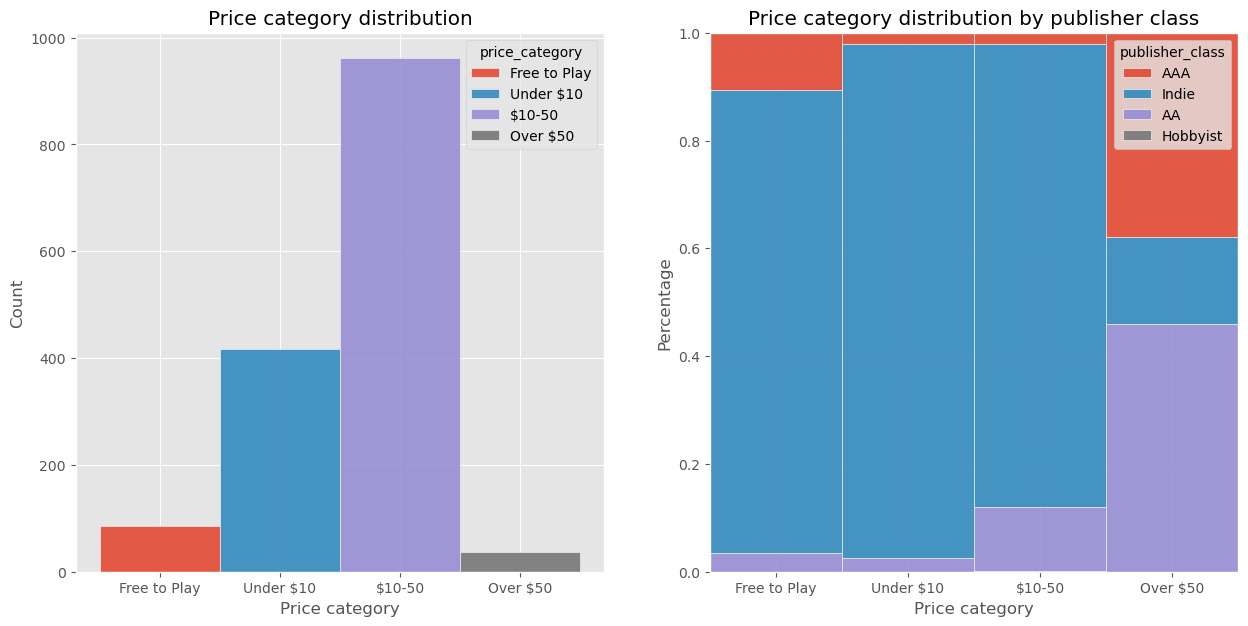

In [116]:
def plot_price_distribution() -> plt.Figure:
    plt.figure()
    sns.histplot(
        data=top_1500_steam,
        x='price',
    )
    plt.title("Price distribution")
    plt.xlabel("Price")
    return plt.gcf()
fig = plot_price_distribution()

def plot_price_category_distribution() -> plt.Figure:
    fig, axes = plt.subplots(1, 2, figsize=(15, 7))
    sns.histplot(
        data=top_1500_steam,
        x='price_category',
        hue='price_category',
        alpha=0.9,
        ax=axes[0]
    )
    axes[0].set_title("Price category distribution")
    axes[0].set_xlabel("Price category")

    sns.histplot(
        data=top_1500_steam,
        x='price_category',
        hue='publisher_class',
        multiple="fill",
        alpha=0.9,
        ax=axes[1]
    )
    axes[1].set_title("Price category distribution by publisher class")
    axes[1].set_xlabel("Price category")
    axes[1].set_ylabel("Percentage")

    return fig

fig = plot_price_category_distribution()

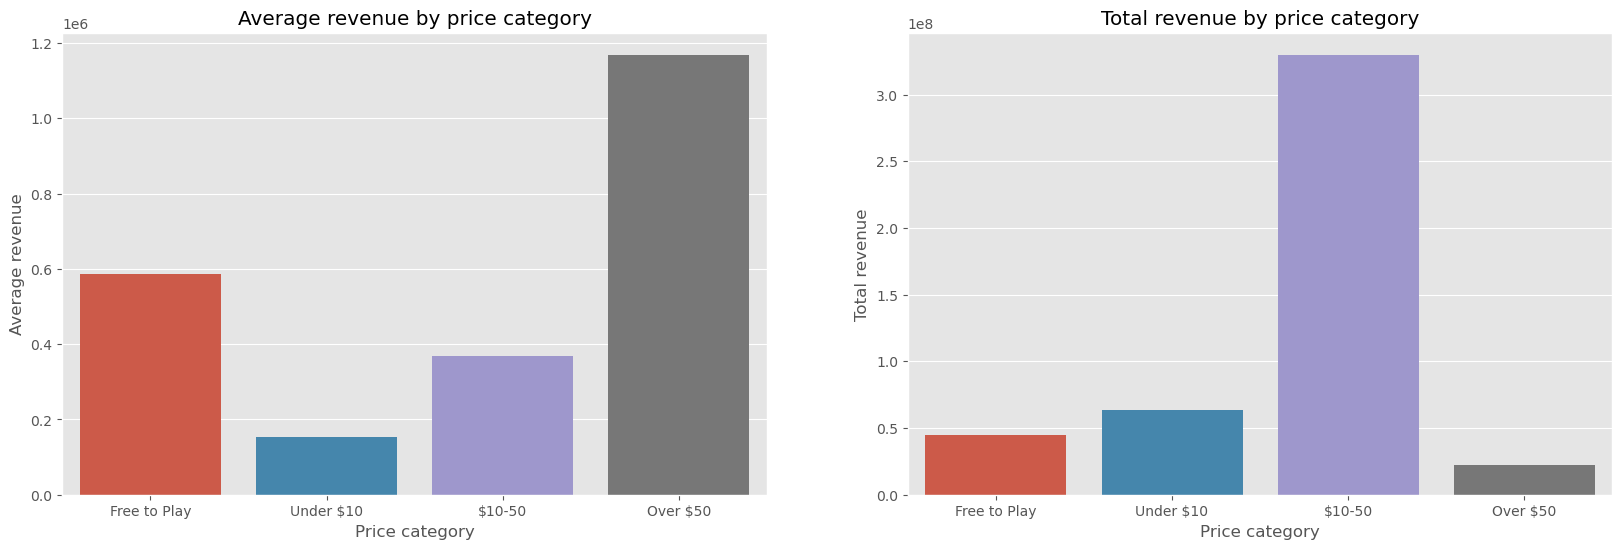

In [106]:
# Revenue by price_category
# revenue_total_by_price_category = top_1500_steam.groupby('price_category', observed=False)['revenue'].sum()
# revenue_avg_by_price_category = top_1500_steam.groupby('price_category', observed=False)['revenue'].mean()

# print(revenue_total_by_price_category, revenue_avg_by_price_category)
def plot_price_and_revenue() -> plt.Figure:
    start, stop = (100, 1000)

    sorted_by_revenue = top_1500_steam.sort_values(by='revenue', ascending=False)

    selection = sorted_by_revenue.iloc[start:]

    fig, axes = plt.subplots(1, 2, figsize=(20, 6))
    axes: list[plt.Axes] = axes.ravel()

    sns.barplot(
        data=selection,
        x='price_category', 
        y='revenue',
        hue='price_category',
        dodge=False,
        estimator=np.mean, 
        errorbar=None,
        ax=axes[0]
    )
    axes[0].set_title('Average revenue by price category')
    axes[0].set_xlabel('Price category')
    axes[0].set_ylabel('Average revenue')

    sns.barplot(
        data=selection,
        x='price_category',
        y='revenue',
        hue='price_category',
        dodge=False,
        estimator=np.sum,
        errorbar=None,
        ax=axes[1]
    )
    axes[1].set_title('Total revenue by price category')
    axes[1].set_xlabel('Price category')
    axes[1].set_ylabel('Total revenue')
    return fig
fig = plot_price_and_revenue()
    # start, stop = (100, 1000)

    # sorted_by_revenue = top_1500_steam.sort_values(by='revenue', ascending=False)

    # selection = sorted_by_revenue.iloc[start:]

    # fig, axes = plt.subplots(1, 2, figsize=(20, 6))
    # axes: list[plt.Axes] = axes.ravel()

    # sns.barplot(
    #     data=selection,
    #     x='price_category', 
    #     y='revenue',
    #     estimator=np.mean, 
    #     errorbar=None,
    #     ax=axes[0]
    # )
    # axes[0].set_title('Mean revenue by price category')

    # sns.barplot(
    #     data=selection,
    #     x='price_category',
    #     y='revenue',
    #     estimator=np.sum,
    #     errorbar=None,
    #     ax=axes[1]
    # )
    # axes[1].set_title('Total revenue by price category')
    # return fig

# Timeline Insights

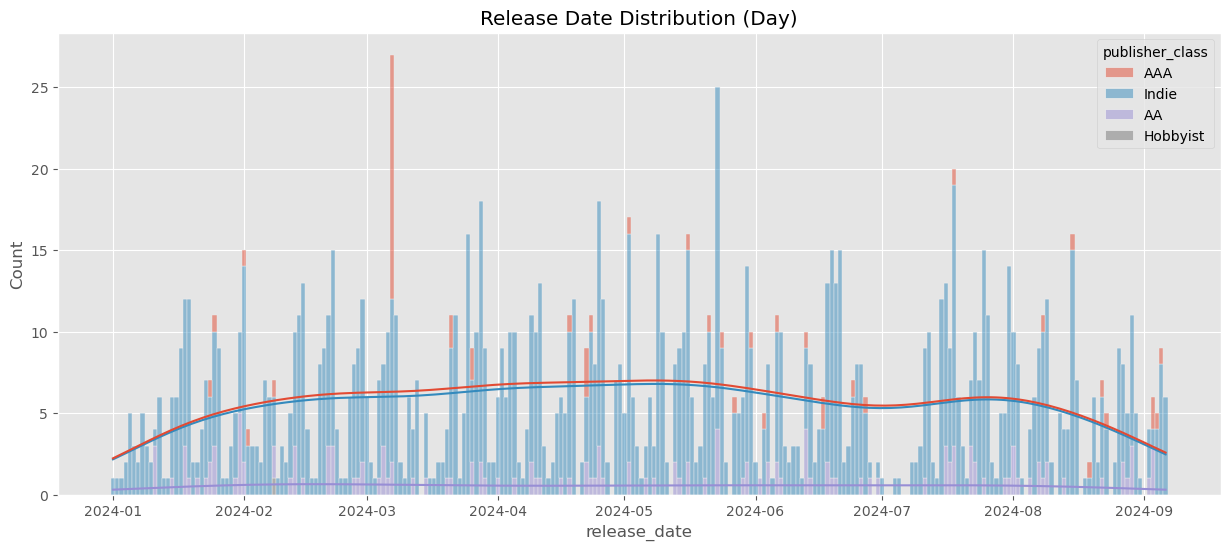

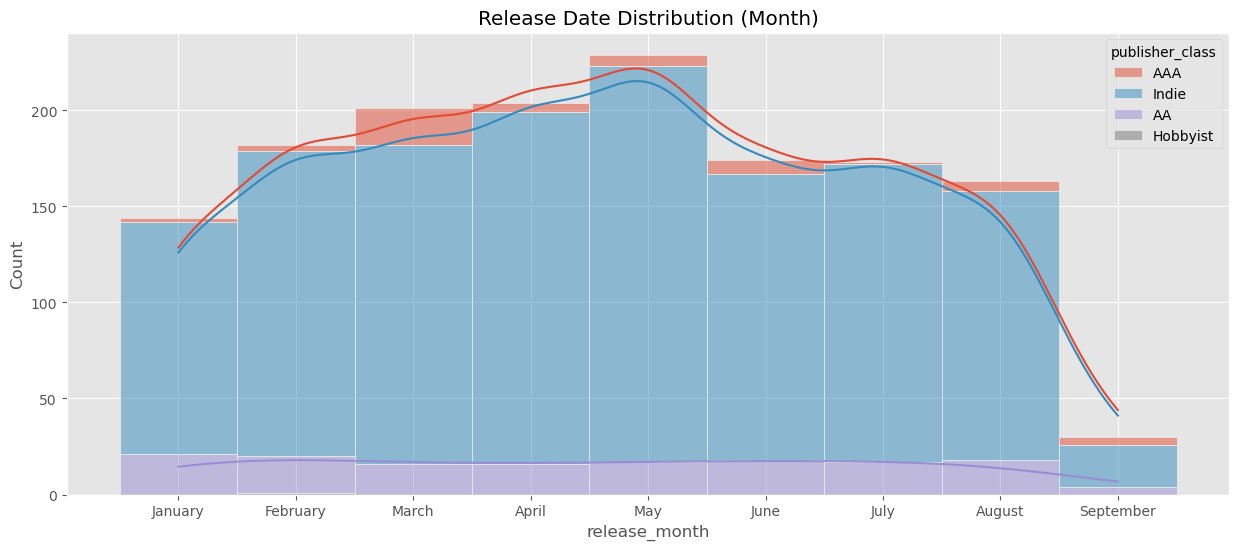

In [84]:
def plot_release_date_distribution() -> tuple[plt.Figure, plt.Figure]:
    fig_1 = plt.figure(figsize=(15, 6))
    sns.histplot(
        data=top_1500_steam,
        x='release_date',
        hue='publisher_class',
        multiple='stack',
        kde=True,
        discrete=True,
    )
    plt.title("Release Date Distribution (Day)")

    fig_2 = plt.figure(figsize=(15, 6))
    sns.histplot(
        data=top_1500_steam,
        x='release_month',
        hue='publisher_class',
        multiple='stack',
        kde=True,
        discrete=True,
    )
    plt.title("Release Date Distribution (Month)")
    return fig_1, fig_2

fig_1, fig_2 = plot_release_date_distribution()

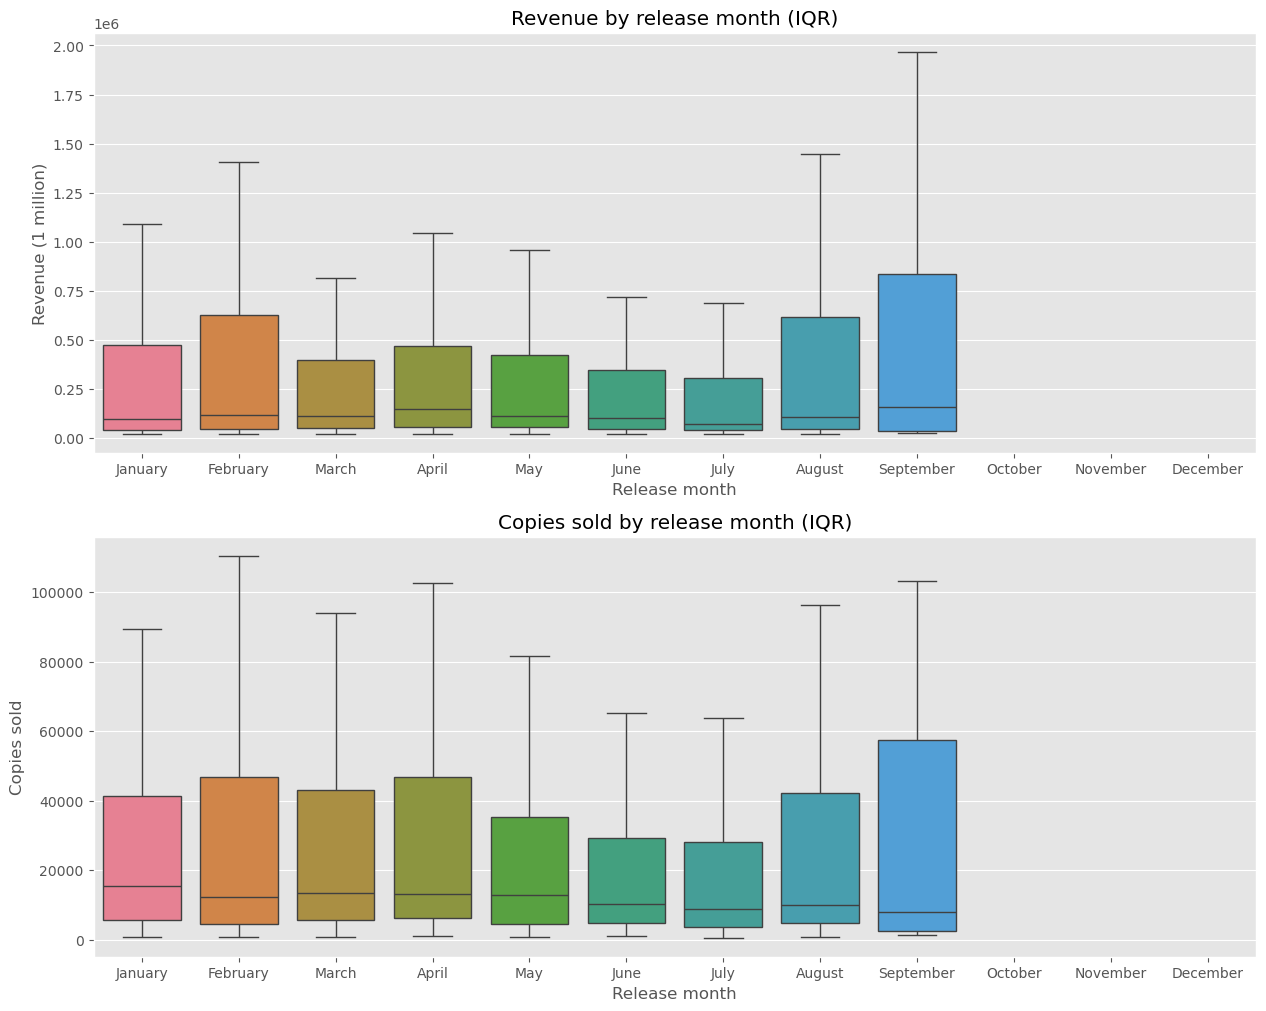

<Figure size 1500x600 with 0 Axes>

In [85]:
# Plotting the distributions of months against revenue gain
def plot_monthly_revenue_distribution() -> plt.Figure:
    fig, axes = plt.subplots(2, 1, figsize=(15, 12))
    sns.boxplot(
        data=top_1500_steam,
        x='release_month',
        y='revenue',
        hue='release_month',
        dodge=False,
        showfliers=False,
        ax=axes[0]
    )
    axes[0].set_title('Revenue by release month (IQR)')
    axes[0].set_xlabel('Release month')
    axes[0].set_ylabel('Revenue (1 million)')
    
    fig = plt.figure(figsize=(15, 6))
    sns.boxplot(
        data=top_1500_steam,
        x='release_month',
        y='copies_sold',
        hue='release_month',
        dodge=False,
        showfliers=False,
        ax=axes[1]
    )
    axes[1].set_title('Copies sold by release month (IQR)')
    axes[1].set_xlabel('Release month')
    axes[1].set_ylabel('Copies sold')
    return fig

fig = plot_monthly_revenue_distribution()

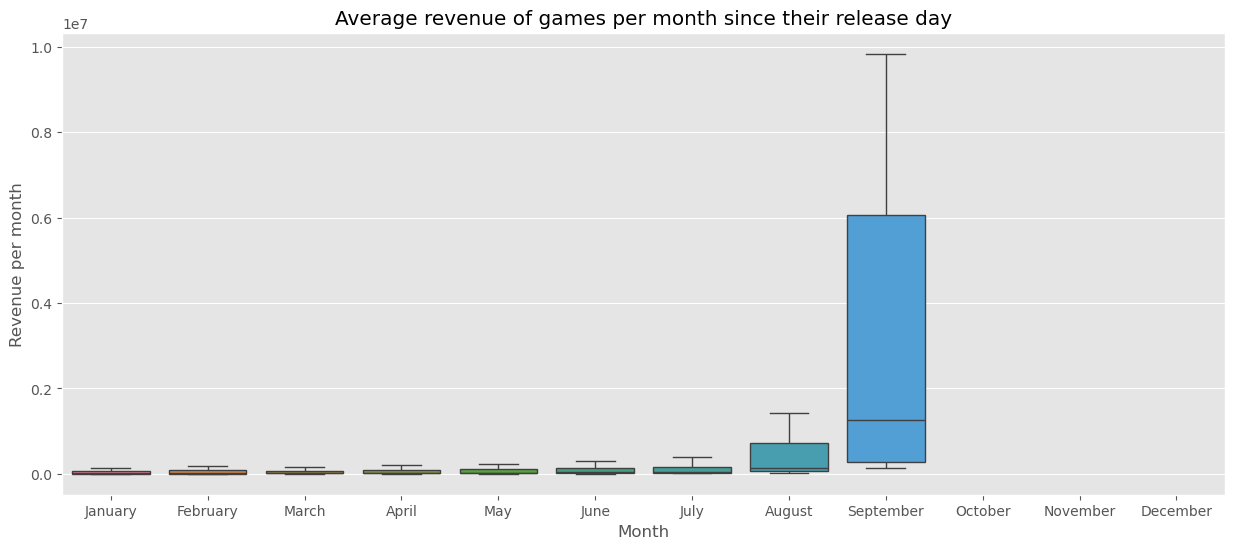

In [49]:
cutoff_date = pd.to_datetime('2024-09-09')
revenue_per_day_since_release = top_1500_steam['revenue'] / (cutoff_date - top_1500_steam['release_date']).dt.days
def plot_revenue_per_week() -> plt.Figure:
    fig = plt.figure(figsize=(15, 6))
    sns.boxplot(
        data = top_1500_steam,
        x = 'release_month',
        y = revenue_per_day_since_release * 30,
        hue='release_month',
        showfliers=False,
        dodge=False
    )
    plt.title('Average revenue of games per month since their release day')
    plt.xlabel('Month')
    plt.ylabel('Revenue per month')

    return fig
fig = plot_revenue_per_week()

# Player Engagement Metrics

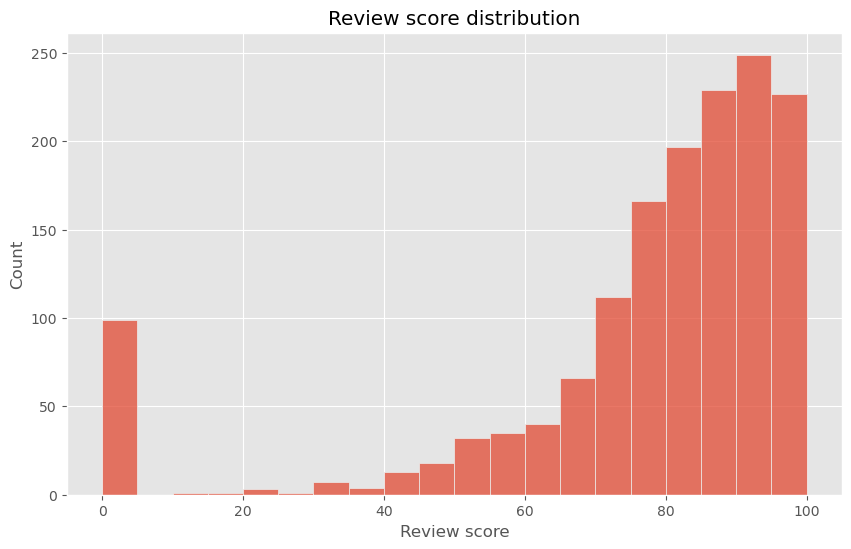

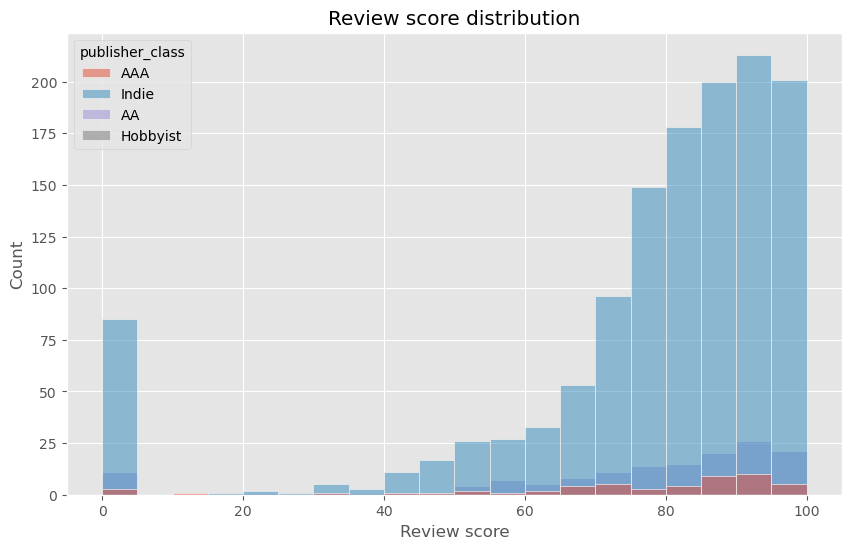

In [120]:
# Distribution of review score
def plot_review_score_distribution() -> plt.Figure:
    fig = plt.figure(figsize=(10, 6))

    sns.histplot(
        data=top_1500_steam,
        x='review_score',
        bins=20,
    )
    plt.title("Review score distribution")
    plt.xlabel("Review score")
    return fig
fig = plot_review_score_distribution()

def plot_review_score_distribution_with_publisher_class() -> plt.Figure:
    fig = plt.figure(figsize=(10, 6))

    sns.histplot(
        data=top_1500_steam,
        x='review_score',
        hue='publisher_class',
        bins=20,
    )
    plt.title("Review score distribution")
    plt.xlabel("Review score")
    return fig
fig = plot_review_score_distribution_with_publisher_class()

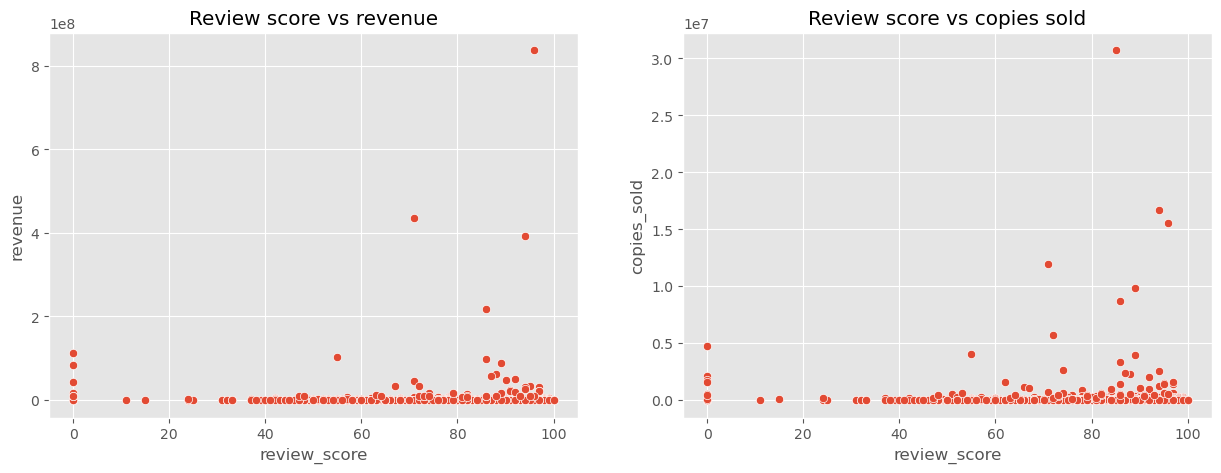

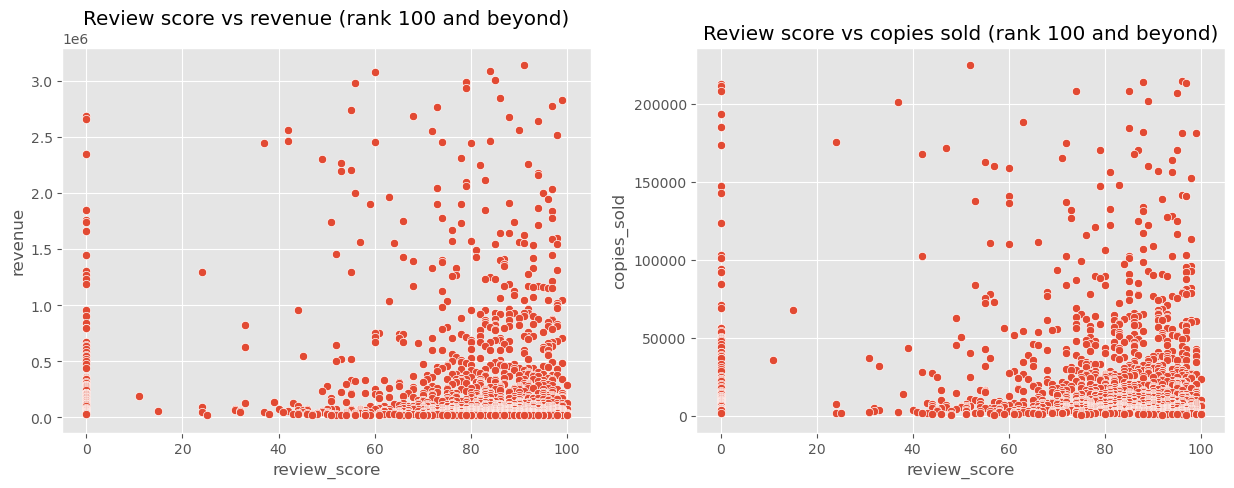

In [68]:
# Checking some trivial claims
# Review Score vs Copies sold
def plot_review_score_correlators() -> plt.Figure:
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    axes: list[plt.Axes] = axes.ravel()

    sns.scatterplot(
        data = top_1500_steam,
        x='review_score',
        y='revenue',
        ax=axes[0]
    )
    axes[0].set_title('Review score vs revenue')


    sns.scatterplot(
        data = top_1500_steam,
        x='review_score',
        y='copies_sold',
        ax=axes[1]
    )
    axes[1].set_title('Review score vs copies sold')
    return fig

fig = plot_review_score_correlators()

def plot_review_score_correlators_outside_top_n(start = 100) -> plt.Figure:
    sorted_by_revenue = top_1500_steam.sort_values(by="revenue", ascending=False)
    sorted_by_copies_sold = top_1500_steam.sort_values(by='copies_sold', ascending=False)

    selection_revenue = sorted_by_revenue.iloc[start:]
    selection_copies_sold = sorted_by_copies_sold.iloc[start:]

    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    axes: list[plt.Axes] = axes.ravel()

    sns.scatterplot(
        data = selection_revenue,
        x='review_score',
        y='revenue',
        ax=axes[0]
    )
    axes[0].set_title(f'Review score vs revenue (rank {start} and beyond)')


    sns.scatterplot(
        data = selection_copies_sold,
        x='review_score',
        y='copies_sold',
        ax=axes[1]
    )
    axes[1].set_title(f'Review score vs copies sold (rank {start} and beyond)')
    return fig

fig = plot_review_score_correlators_outside_top_n()


# Review score vs revenue

# Reveiw score vs average playtime

# Review score vs publisher class

Text(0.5, 1.0, 'Average revenue by review score category')

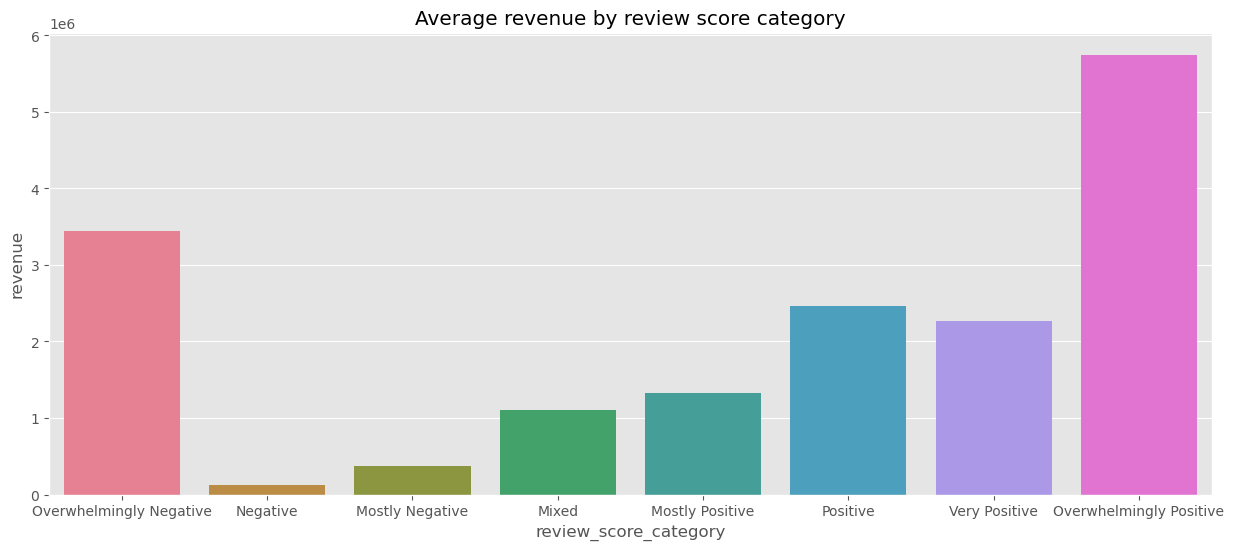

In [83]:
# Binning the review scores together
def plot_review_score_category():
    plt.figure(figsize=(15, 6))
    sns.barplot(
        data = top_1500_steam,
        x = 'review_score_category',
        y = 'revenue',
        hue = 'review_score_category',
        dodge = False,
        estimator=np.mean,
        errorbar=None
    )
    plt.title("Average revenue by review score category")

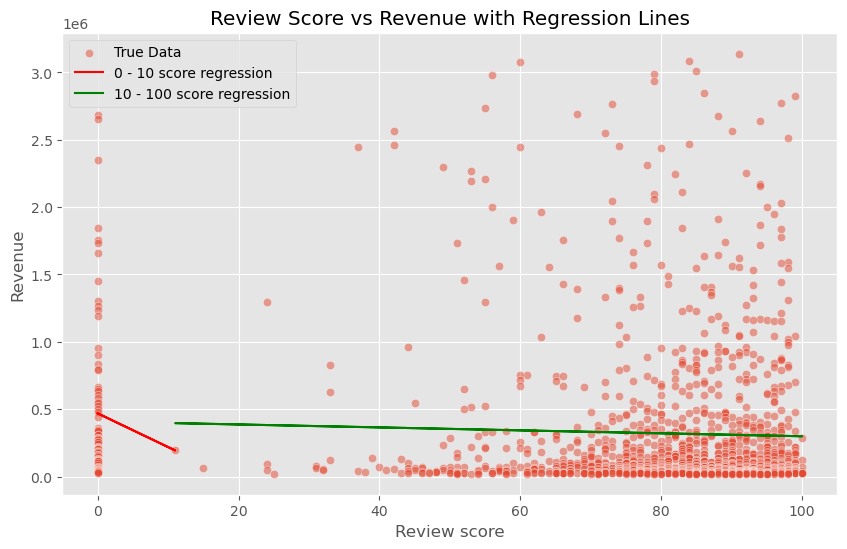

In [138]:
    
def plot_review_score_double_regression() -> plt.Figure:
    sorted_by_revenue = top_1500_steam.sort_values(by="revenue", ascending=False)

    selection_revenue = sorted_by_revenue.iloc[100:]

    negative_review_scores = selection_revenue[selection_revenue['review_score'] <= 12]
    positive_review_scores = selection_revenue[selection_revenue['review_score'] > 9]

    negative_review_score_regression = LinearRegression()
    positive_review_score_regression = LinearRegression()

    x_negatives = negative_review_scores['review_score'].values.reshape(-1, 1)
    y_negatives = negative_review_scores['revenue'].values

    x_positives = positive_review_scores['review_score'].values.reshape(-1, 1)
    y_positives = positive_review_scores['revenue'].values

    negative_review_score_regression.fit(x_negatives, y_negatives)
    positive_review_score_regression.fit(x_positives, y_positives)

    y_predicted_negatives = negative_review_score_regression.predict(x_negatives)
    y_predicted_positives = positive_review_score_regression.predict(x_positives)

    fig = plt.figure(figsize=(10, 6))
    sns.scatterplot(
        data=selection_revenue,
        x='review_score',
        y='revenue',
        label='True Data',
        alpha=0.5,
    )

    plt.plot(
        negative_review_scores['review_score'],
        y_predicted_negatives,
        color='red',
        label='0 - 10 score regression',
    )

    plt.plot(
        positive_review_scores['review_score'],
        y_predicted_positives,
        color='green',
        label='10 - 100 score regression',
    )

    plt.xlabel('Review score')
    plt.ylabel('Revenue')
    plt.title('Review Score vs Revenue with Regression Lines')
    plt.legend()
    return fig
fig = plot_review_score_double_regression()

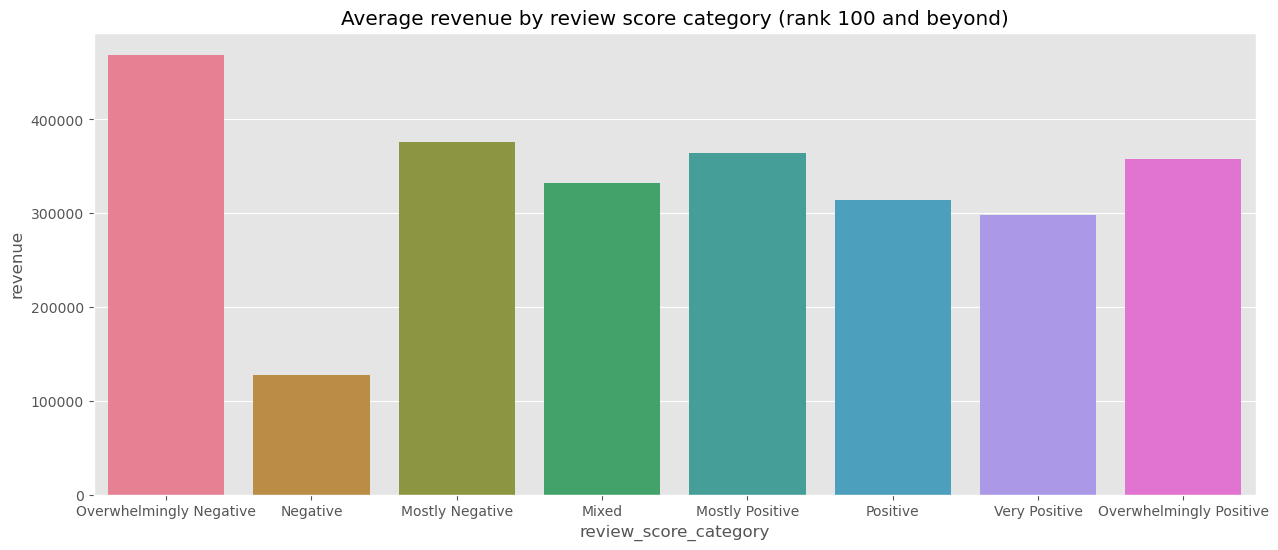

In [139]:
def plot_review_score_category_top_n() -> plt.Figure:
    sorted_by_revenue = top_1500_steam.sort_values(by="revenue", ascending=False)

    selection_revenue = sorted_by_revenue.iloc[100:]
    fig = plt.figure(figsize=(15, 6))
    sns.barplot(
        data = selection_revenue,
        x = 'review_score_category',
        y = 'revenue',
        hue = 'review_score_category',
        dodge = False,
        estimator=np.mean,
        errorbar=None
    )
    plt.title("Average revenue by review score category (rank 100 and beyond)")
    return fig
fig = plot_review_score_category_top_n()

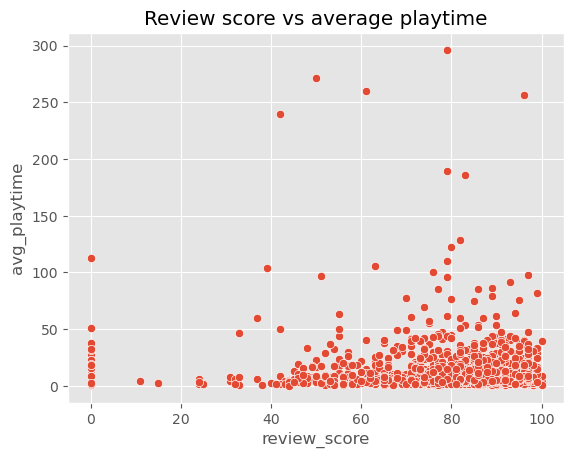

In [90]:
# Review Score vs average playtime
def plot_review_score_against_avg_playtime() -> plt.Figure:
    fig = plt.figure()
    sns.scatterplot(
        data=top_1500_steam,
        x='review_score',
        y='avg_playtime',
    )
    plt.title("Review score vs average playtime")
    return fig
fig = plot_review_score_against_avg_playtime()

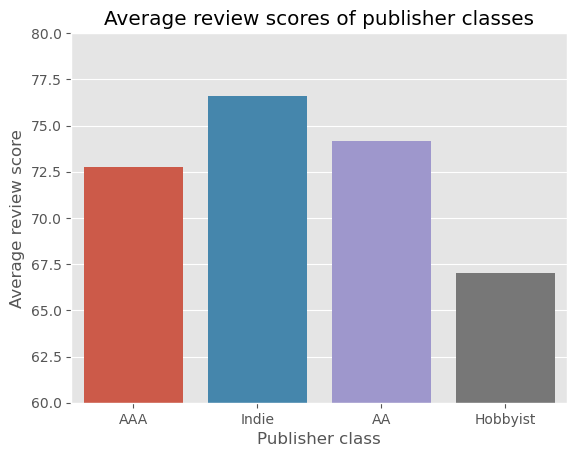

In [100]:
# Review score vs publisher class
def plot_review_score_against_publisher_class() -> plt.Figure:
    fig = plt.figure()
    sns.barplot(
        data=top_1500_steam,
        x='publisher_class',
        y='review_score',
        hue='publisher_class',
        dodge=False,
        estimator=np.mean,
        errorbar=None,
    )
    plt.ylim(60, 80)
    plt.xlabel('Publisher class')
    plt.ylabel('Average review score')
    plt.title('Average review scores of publisher classes')
    return fig
fig = plot_review_score_against_publisher_class()

From these distribution plots, we can notice that within copies_sold, revenue, and avg_playtime, we have a few extreme outliers that heavily skew our distribution. 

TODO: offer some extra insight on why this might be, we are already within the top games after all.

Lets analyze them a bit further.

Our top 10 games account for more than _half_ of all game copies sold for our entire dataset!

Insights:

Examining our distributions outside our top 10, ranging from our rank 100 to rank 1000 game in terms of copies sold:

We can see there is a long tail of games

Lets check whether if our publisher class has any bearing on our copies sold:

Though our categorical boxplots plot does not look great, it reinstates the _heavy_ skew toward the top dogs in the marketplace.

This bar chart showcases a discrepancy, even though we are seeing tons of indie game outliers with many many copies sold, on average, we can see that AA and AAA publishers beat out indie games on average by a _wide_ margin.

# Dashboard

In [45]:
def dashboard_plot_cumulative_revenue() -> go.Figure:
    sorted_by_revenue = top_1500_steam.sort_values(by="revenue", ascending=False)
    cumulative_revenues = sorted_by_revenue['revenue'].cumsum()
    total_revenue = top_1500_steam['revenue'].sum()

    cumulative_revenues = pd.DataFrame(
        {
            "rank": cumulative_revenues.index,
            "cumulative_revenue": cumulative_revenues.values,
            "proportion_to_total_revenue": cumulative_revenues.values / total_revenue,
        }
    )
    print(cumulative_revenues)
    
    fig = go.Figure()
    
    fig.add_trace(go.Scatter(
        x=cumulative_revenues.index,
        y=cumulative_revenues['cumulative_revenue'],
        mode='lines',
        name='Cumulative revenue',
        hovertemplate=(
            'Rank: %{x}<br>' +
            'Cumulative revenue: %{y}<br>' +
            'Proportion to total revenue: %{text:.4f}<br>' +
            '<extra></extra>'
        ),
        text=cumulative_revenues['proportion_to_total_revenue']
    ))

    # Bringing attention to some key figures
    fig.add_annotation(
        x=10,
        y=cumulative_revenues.loc[9, 'cumulative_revenue'],
        text=f'Top 10 revenues accounts<br>for {cumulative_revenues.loc[9, 'proportion_to_total_revenue'] * 100:.2f}% of total',
        showarrow=True,
        arrowhead=2,
        ax = 130,
        ay = 30,
    )

    fig.add_annotation(
        x=100,
        y=cumulative_revenues.loc[99, 'cumulative_revenue'],
        text=f'Top 100 revenues accounts<br>for {cumulative_revenues.loc[99, 'proportion_to_total_revenue'] * 100:.2f}% of total',
        showarrow=True,
        arrowhead=2,
        ax = 80,
        ay = 40,
    )
    
    fig.update_layout(
        title="Cumulative revenues",
        xaxis_title="Rank",
        yaxis_title="Total revenue",
        width=1000,
        height=500
    )
    
    return fig

fig = dashboard_plot_cumulative_revenue()
fig.show()

      rank  cumulative_revenue  proportion_to_total_revenue
0     1450        8.377934e+08                     0.212176
1     1451        1.273429e+09                     0.322504
2     1452        1.665758e+09                     0.421863
3     1453        1.882775e+09                     0.476824
4     1454        1.994254e+09                     0.505057
...    ...                 ...                          ...
1495  1095        3.948490e+09                     0.999979
1496  1096        3.948511e+09                     0.999984
1497  1097        3.948532e+09                     0.999990
1498  1098        3.948552e+09                     0.999995
1499  1099        3.948573e+09                     1.000000

[1500 rows x 3 columns]


In [67]:
def dashboard_plot_publisher_class_revenues(use_median: bool = False, show_fliers: bool = True) -> go.Figure:
    fig = make_subplots(rows=1, cols=2, subplot_titles=("Boxplots for revenue by publisher class", "Average revenue by publisher class"))
    
    publisher_classes = top_1500_steam['publisher_class'].unique()

    for publisher_class in publisher_classes:
        revenue_data = top_1500_steam[top_1500_steam['publisher_class'] == publisher_class]['revenue']
        
        q1 = revenue_data.quantile(0.25)
        q3 = revenue_data.quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        if not show_fliers:
            revenue_data = revenue_data[(revenue_data >= lower_bound) & (revenue_data <= upper_bound)]
        
        fig.add_trace(
            go.Box(
                y=revenue_data,
                name=publisher_class,
                boxmean=True,
                boxpoints="all" if show_fliers else False
            ),
            row=1, col=1
        )
    
    if use_median:
        avg_revenue_by_publisher = top_1500_steam.groupby('publisher_class')['revenue'].median().reset_index()
    else:
        avg_revenue_by_publisher = top_1500_steam.groupby('publisher_class')['revenue'].mean().reset_index()

    fig.add_trace(
        go.Bar(
            x=avg_revenue_by_publisher["publisher_class"],
            y=avg_revenue_by_publisher["revenue"],
            name="Average revenue" if not use_median else "Median revenue"
        ),
        row=1, col=2
    )

    fig.update_layout(
        title="Publisher class revenue analysis",
        width=1000,
        height=500,
    )

    fig.update_xaxes(title_text="Publisher class", row=1, col=1)
    fig.update_yaxes(title_text="Revenue", row=1, col=1)

    fig.update_xaxes(title_text="Publisher class", row=1, col=2)
    fig.update_yaxes(title_text="Average revenue" if not use_median else "Median revenue", row=1, col=2)

    return fig

fig = dashboard_plot_publisher_class_revenues(use_median=False, show_fliers=False)

fig.show()

In [65]:
def dashboard_plot_price_and_revenue() -> go.Figure:
    start, stop = (100, 1000)

    sorted_by_revenue = top_1500_steam.sort_values(by='revenue', ascending=False)

    selection = sorted_by_revenue.iloc[start:]

    avg_revenue_by_price = selection.groupby('price_category', observed=False)['revenue'].mean().reset_index()
    total_revenue_by_price = selection.groupby('price_category', observed=False)['revenue'].sum().reset_index()

    colors = pc.qualitative.Plotly

    fig = make_subplots(rows=1, cols=2, subplot_titles=("Average revenue by price category", "Total revenue by price category"))

    fig.add_trace(
        go.Bar(
            x=avg_revenue_by_price['price_category'],
            y=avg_revenue_by_price['revenue'],
            name='Average Revenue',
            marker=dict(color=colors),
            showlegend=False
        ),
        row=1, col=1
    )

    fig.add_trace(
        go.Bar(
            x=total_revenue_by_price['price_category'],
            y=total_revenue_by_price['revenue'],
            name='Total Revenue',
            marker=dict(color=colors),
            showlegend=False
        ),
        row=1, col=2
    )

    fig.update_layout(
        title="Revenue by price category",
        width=1000,
        height=500,
    )

    fig.update_xaxes(title_text="Price category", row=1, col=1)
    fig.update_yaxes(title_text="Average revenue", row=1, col=1)

    fig.update_xaxes(title_text="Price category", row=1, col=2)
    fig.update_yaxes(title_text="Total revenue", row=1, col=2)

    return fig
fig = dashboard_plot_price_and_revenue()
fig.show()

In [151]:
def plot_monthly_revenue_distribution() -> go.Figure:
    monthly_stats = top_1500_steam.groupby('release_month', observed=False)['revenue'].agg(['median', 'mean']).reset_index()

    fig = go.Figure()
    fig.add_trace(
        go.Scatter(
            x=monthly_stats['release_month'],
            y=monthly_stats['median'],
            mode='lines+markers',
            name='Median revenue',
        )
    )

    fig.add_trace(
        go.Scatter(
            x=monthly_stats['release_month'],
            y=monthly_stats['mean'],
            mode='lines+markers',
            name='Mean revenue',
        )
    )
    fig.update_layout(
        title="Average and median revenue by release month",
        xaxis_title="Release month",
        yaxis_title="Revenue (1 million)",
        width=1000,
        height=500
    )
    
    return fig

fig = plot_monthly_revenue_distribution()
fig.show()


In [149]:
def dashboard_plot_review_score_double_regression(regression_split_metric: int = 15) -> go.Figure:
    sorted_by_revenue = top_1500_steam.sort_values(by="revenue", ascending=False)
    selection_revenue = sorted_by_revenue.iloc[100:].reset_index()

    abs_difference = abs(selection_revenue['review_score'] - regression_split_metric)
    closest_index = abs_difference.idxmin()
    closest_review_score = selection_revenue.iloc[closest_index]['review_score']

    negative_review_scores = selection_revenue[selection_revenue['review_score'] <= closest_review_score]
    positive_review_scores = selection_revenue[selection_revenue['review_score'] >= closest_review_score]

    negative_review_score_regression = LinearRegression()
    positive_review_score_regression = LinearRegression()

    x_negatives = negative_review_scores['review_score'].values.reshape(-1, 1)
    y_negatives = negative_review_scores['revenue'].values

    x_positives = positive_review_scores['review_score'].values.reshape(-1, 1)
    y_positives = positive_review_scores['revenue'].values

    negative_review_score_regression.fit(x_negatives, y_negatives)
    positive_review_score_regression.fit(x_positives, y_positives)

    y_predicted_negatives = negative_review_score_regression.predict(x_negatives)
    y_predicted_positives = positive_review_score_regression.predict(x_positives)

    fig = go.Figure()
    fig.add_trace(
        go.Scatter(
            x=selection_revenue["review_score"],
            y=selection_revenue["revenue"],
            mode="markers",
            name="True Data",
            marker=dict(opacity=0.5),
        )
    )

    fig.add_trace(
        go.Scatter(
            x=negative_review_scores["review_score"],
            y=y_predicted_negatives,
            mode="lines",
            name=f"0 - {regression_split_metric} score regression",
        )
    )

    fig.add_trace(
        go.Scatter(
            x=positive_review_scores["review_score"],
            y=y_predicted_positives,
            mode="lines",
            name=f"{regression_split_metric} - 100 score regression",
        )
    )

    fig.update_layout(
        title="Review score vs revenue with double regression line",
        xaxis_title="Review score",
        yaxis_title="Revenue",
        width=800,
        height=600,
        legend=dict(x=.8, y=1, bgcolor='rgba(255,255,255,0.3)')
    )

    return fig

fig = dashboard_plot_review_score_double_regression()
fig.show()